In [1]:
import numpy as np
import keras as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.applications.vgg16 import VGG16
from keras.datasets import cifar10
from keras.utils import np_utils

/home/prerit/anaconda3/envs/TENSORFLOW/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# IMPORTING IMAGES FOR TRAIN AND TEST SET

In [2]:
train_path = 'images/train'
valid_path = 'images/valid'
test_path = 'images/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size = (224,224),classes = ['dog','cat'],batch_size = 10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size = (224,224),classes = ['dog','cat'],batch_size = 6)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size = (224,224),classes = ['dog','cat'],batch_size = 5)

Found 416 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [4]:
def plots(ims,figsize = (12,6),rows = 1,interp = False , titles = None):
    if(type(ims[0]) is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims) //rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize = 16)
        plt.imshow(ims[i],interpolation = None if interp else 'none')

In [5]:
imgs , labels = next(train_batches)

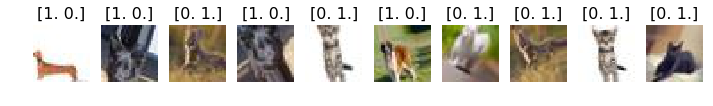

In [6]:
plots(imgs,titles = labels)

# BUILD AND TRAIN MODEL

In [7]:
model = Sequential([Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
                   Flatten(),
                   Dense(2,activation = 'softmax')])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(Adam(lr = 0.0001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [10]:
model.fit_generator(train_batches,steps_per_epoch = 10,validation_data = valid_batches,validation_steps = 5,epochs = 10,verbose = 2)

Epoch 1/10
 - 4s - loss: 8.2988 - acc: 0.4800 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 2/10
 - 3s - loss: 7.0920 - acc: 0.5600 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 3/10
 - 3s - loss: 7.5755 - acc: 0.5300 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 4/10
 - 3s - loss: 8.1232 - acc: 0.4960 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 5/10
 - 3s - loss: 7.0920 - acc: 0.5600 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 6/10
 - 3s - loss: 7.4143 - acc: 0.5400 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 7/10
 - 3s - loss: 7.4143 - acc: 0.5400 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 8/10
 - 3s - loss: 8.8680 - acc: 0.4498 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 9/10
 - 3s - loss: 7.2531 - acc: 0.5500 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 10/10
 - 4s - loss: 7.5755 - acc: 0.5300 - val_loss: 8.3814 - val_acc: 0.4800


Here we see that accuracy is only 50% because or model contains only 1 convolutional layer. Therefore accuracy can be increased by adding more convolution layer and max pooling layers.Now we will add more Convolution layers in next stage to get more accuracy.

# PREDICTION

In [52]:
test_imgs , test_labels = next(test_batches)
test_labels = test_labels[:,0]

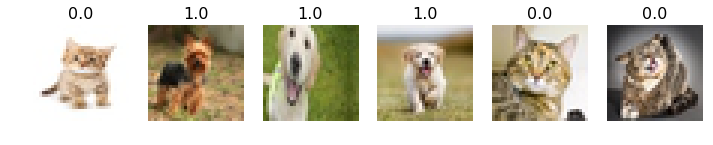

In [53]:
plots(test_imgs,titles = test_labels)

In [54]:
predictions = model.predict_generator(test_batches,steps = 1,verbose = 0)

In [55]:
for i in range(len(predictions)):
    print(predictions[i][0])

0.0
0.0
0.0
0.0
0.0
0.0


So we see that all images are classified as dogs only.Therefore accuracy is just 50% which is very poor.
So we will add more Conv2D layers to increase our accuracy.

In [3]:
(x_train,y_train),(x_valid,y_valid) = cifar10.load_data()

In [4]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_valid.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_valid = np_utils.to_categorical(y_valid, num_classes)
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_train  /= 255
x_valid /= 255

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [8]:
model.compile(Adam(lr=0.0001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [9]:
model.fit(x_train, y_train,batch_size=16,epochs=50,shuffle=True,verbose=1,validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 389s 8ms/step - loss: 1.6579 - acc: 0.3888 - val_loss: 1.3801 - val_acc: 0.5091
Epoch 2/50
50000/50000 [==============================] - 389s 8ms/step - loss: 1.3402 - acc: 0.5187 - val_loss: 1.1849 - val_acc: 0.5816
Epoch 3/50
50000/50000 [==============================] - 388s 8ms/step - loss: 1.2072 - acc: 0.5735 - val_loss: 1.0920 - val_acc: 0.6186
Epoch 4/50
50000/50000 [==============================] - 366s 7ms/step - loss: 1.1006 - acc: 0.6114 - val_loss: 0.9761 - val_acc: 0.6566
Epoch 5/50
50000/50000 [==============================] - 340s 7ms/step - loss: 1.0218 - acc: 0.6409 - val_loss: 0.9412 - val_acc: 0.6676
Epoch 6/50
50000/50000 [==============================] - 393s 8ms/step - loss: 0.9533 - acc: 0.6663 - val_loss: 0.8649 - val_acc: 0.6984
Epoch 7/50
50000/50000 [==============================] - 394s 8ms/step - loss: 0.9010 - acc: 0.6840 - val_loss: 0.8505 - 

In [10]:
from keras.models import load_model

In [11]:
model.save('my_model.h5')

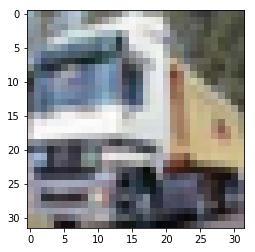

In [16]:
plt.imshow(x_train[1],interpolation = 'nearest')

In [17]:
model.predict(x_train[:2])

array([[7.78018882e-12, 8.95652275e-10, 1.19335840e-04, 3.71642853e-03,
        1.17100906e-04, 3.01833916e-03, 9.93024945e-01, 3.88747094e-06,
        1.98219580e-10, 6.03262718e-11],
       [1.30148718e-08, 7.36028527e-09, 9.56805642e-12, 4.89579894e-14,
        8.18548156e-18, 3.50914936e-10, 2.22929261e-17, 1.06567399e-09,
        3.12570560e-11, 1.00000000e+00]], dtype=float32)